<a href="https://colab.research.google.com/github/chalapathi444/algorithms-in-tensorflow/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


**THE LIBRARIES REQUIRED FOR THIS MODEL**

In [0]:
import sys 
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import cv2

This model is about classifiying a images of two classes. The two classes are 

*   image of blood cell affected by Diarrhea
*    image of blodd cell not affected by Diarrhea

I have converted the images into numpy arrays and stored in drive 

In [3]:
X1 = np.load('/content/drive/My Drive/some.npy')
Y1 = np.ones((X1.shape[0],1))
print(X1[0].shape)

(50, 50, 3)


In [0]:
X2 = np.load('/content/drive/My Drive/some2.npy')
Y2 = np.zeros((X2.shape[0],1))

Visualizing the images


Text(0.5, 1.0, 'not affected by Diarrhea')

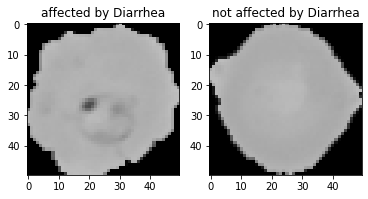

In [5]:
plt.subplot(121)
plt.imshow(X1[0])
plt.title("affected by Diarrhea")
plt.subplot(122)
plt.imshow(X2[0])
plt.title("not affected by Diarrhea")

In [0]:
X_train = np.vstack((X1,X2))/255.0
Y_train = np.vstack((Y1,Y2))

In [0]:
class MycallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if(logs.get('acc') > 0.98):
      print('Accuracy reached')
      self.model.stop_trianing = True
callback = MycallBack()

In [8]:
print(X_train.shape)
print(Y_train.shape)

(22046, 50, 50, 3)
(22046, 1)


In [9]:
#neural network architecture
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu',input_shape = (50,50,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(520,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(240,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=1))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 520)               4792840   
_________________________________________________________________
dropout (Dropout)            (None, 520)               0

In [0]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.BinaryCrossentropy(from_logits= True),metrics=['acc'])

In [11]:
model.fit(X_train,Y_train,epochs = 15)

Train on 22046 samples
Epoch 1/15
22046/22046 [==============================] - 16s 737us/sample - loss: 0.6551 - acc: 0.5526
Epoch 2/15
22046/22046 [==============================] - 16s 717us/sample - loss: 0.2903 - acc: 0.8744
Epoch 3/15
22046/22046 [==============================] - 16s 720us/sample - loss: 0.1858 - acc: 0.9378
Epoch 4/15
22046/22046 [==============================] - 16s 720us/sample - loss: 0.1701 - acc: 0.9418
Epoch 5/15
22046/22046 [==============================] - 16s 723us/sample - loss: 0.1638 - acc: 0.9448
Epoch 6/15
22046/22046 [==============================] - 16s 724us/sample - loss: 0.1561 - acc: 0.9464
Epoch 7/15
22046/22046 [==============================] - 16s 735us/sample - loss: 0.1460 - acc: 0.9501
Epoch 8/15
22046/22046 [==============================] - 16s 729us/sample - loss: 0.1399 - acc: 0.9510
Epoch 9/15
22046/22046 [==============================] - 16s 722us/sample - loss: 0.1317 - acc: 0.9538
Epoch 10/15
22046/22046 [================

Testing on cross validation set 


In [0]:
N_X = np.load('/content/drive/My Drive/some3.npy')
N_Y = np.ones((N_X.shape[0],1))
N_X1 = np.load('/content/drive/My Drive/some4.npy')
N_Y1 = np.zeros((N_X1.shape[0],1))

In [0]:
X_valid = np.vstack((N_X,N_X1))/255
Y_valid = np.vstack((N_Y,N_Y1))

In [14]:
model.evaluate(X_valid,Y_valid)

5512/5512 [==============================] - 1s 232us/sample - loss: 0.2314 - acc: 0.9434


[0.231372594230515, 0.9433962]

In [0]:
#accuracy is reached to 94